### Import reuired modules

In [1]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
from porousmedialab.batch import Batch
import numpy as np
import seaborn as sns
%matplotlib inline

### Initiate the model

In [2]:
bl = Batch(tend = 1, dt = 0.01)

### Create your solution

In [3]:
# Acids
bl.add_species(name='H2CO3', init_conc=0)
bl.add_species(name='HCO3', init_conc=0)
bl.add_species(name='CO3', init_conc=0)

bl.add_acid(species=['H2CO3', 'HCO3', 'CO3'], pKa=[3.6, 10.32])


bl.add_species(name='H2SO4', init_conc=0)
bl.add_species(name='HSO4',  init_conc=0)
bl.add_species(name='SO4',  init_conc=0)

bl.add_acid(species=['H2SO4', 'HSO4', 'SO4'], pKa=[-10, 1.99])

# Minerals
bl.add_species(name='CaCO3', init_conc=0)
bl.add_species(name='CaSO4', init_conc=0)

# dissolved Ca
bl.add_species(name='Ca', init_conc=0)
bl.add_ion(name='Ca', charge=2)

### Specify rate constants

In [4]:
bl.constants['Ks_CaCO3'] = 3.3e-9
bl.constants['Ks_CaSO4'] = 10**-4.58
bl.constants['k_pre'] = 1e-4
bl.constants['k_dis'] = 1e-3

### Specify rates

In [5]:
bl.rates['R_pre_CaCO3'] = 'k_pre * (Ca*CO3/Ks_CaCO3-1)'
bl.rates['R_pre_CaSO4'] = 'k_pre * (Ca*SO4/Ks_CaSO4-1)'
bl.rates['R_dis_CaCO3'] = 'k_dis * CaCO3 * (1 - Ca*CO3/Ks_CaCO3)'
bl.rates['R_dis_CaSO4'] = 'k_dis * CaSO4 * (1 - Ca*SO4/Ks_CaSO4)'

### ODE

In [6]:
bl.dcdt['CaCO3'] = 'R_pre_CaCO3 - R_dis_CaCO3'
bl.dcdt['Ca'] = '-R_pre_CaCO3 + R_dis_CaCO3 - R_pre_CaSO4 + R_dis_CaSO4+1.4e-2'
bl.dcdt['CO3'] = '-R_pre_CaCO3 + R_dis_CaCO3+0.7e-2'
bl.dcdt['CaSO4'] = 'R_pre_CaSO4 - R_dis_CaSO4'
bl.dcdt['SO4'] = '-R_pre_CaSO4 + R_dis_CaSO4+0.7e-2'

In [7]:
bl.solve()

Simulation started:
	 2018-09-30 09:35:49


Estimated time of the code execution:
	 0h:00m:00s
Will finish approx.:
	 2018-09-30 09:35:50


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


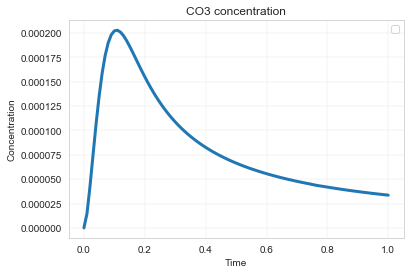

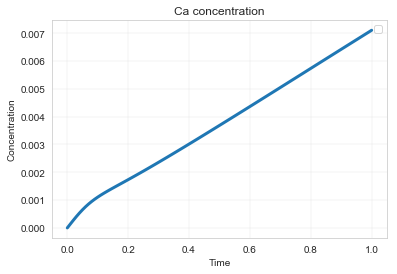

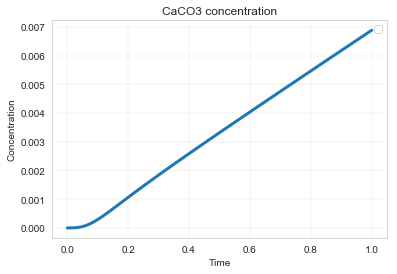

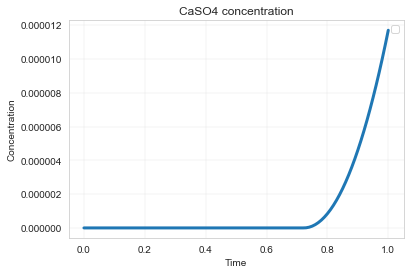

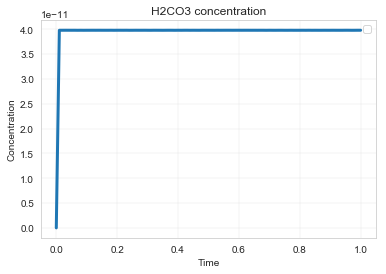

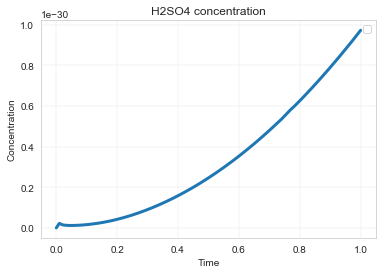

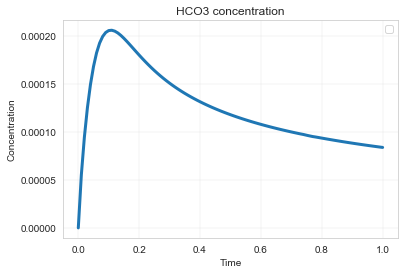

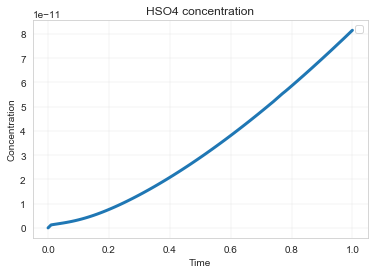

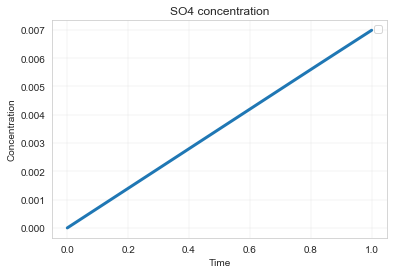

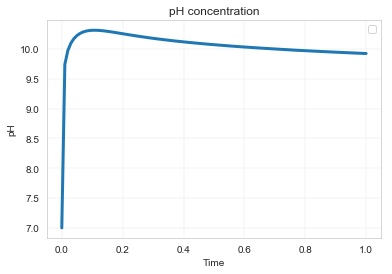

In [8]:
bl.plot_profiles()

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


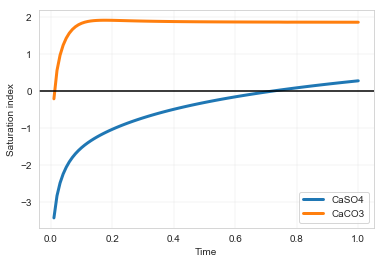

In [9]:
ax = plt.subplot(111)
ax.plot(bl.time, np.log10(bl.SO4['concentration'][0]*bl.Ca['concentration'][0]/bl.constants['Ks_CaSO4']), label='CaSO4', lw=3)
ax.plot(bl.time, np.log10(bl.CO3['concentration'][0]*bl.Ca['concentration'][0]/bl.constants['Ks_CaCO3']), label='CaCO3', lw=3)
ax.axhline(0, c='k')
ax.set_ylabel('Saturation index')
ax.set_xlabel('Time')
ax.grid(lw=0.2)
ax.legend(frameon=1)

In [10]:
# bl.reconstruct_rates()
# bl.plot_rates()